In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
from newsapi import NewsApiClient
newsapi = NewsApiClient(os.getenv('NEWS_API_KEY'))



In [4]:
# Create a newsapi client

In [5]:
# Fetch the Bitcoin news articles

bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]


Total articles about Bitcoin: 3554


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'Tom McKay',
 'title': 'God Help Us, the Winklevoss Twins Are Co-Producing a Movie About Their Bitcoin Journey',
 'description': 'The Winklevoss twins—the brothers Mark Zuckerberg allegedly stole the idea for Facebook from—are making a movie about themselves, Deadline reported this week. If that doesn’t seem masturbatory enough, rejoice: said film is about how they amassed a net wealth …',
 'url': 'https://gizmodo.com/god-help-us-the-winklevoss-twins-are-co-producing-a-mo-1843973511',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/iujekjzgrttsevxxzbop.jpg',
 'publishedAt': '2020-06-09T23:45:00Z',
 'content': 'The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]'}

In [6]:
# Fetch the Ethereum news articles

ethe_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethe_headlines['totalResults']}")

# Show sample article
ethe_headlines["articles"][0]

Total articles about Ethereum: 949


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Henry Pickavet',
 'title': 'Crypto Startup School: How to build projects and keep them safe',
 'description': 'Week five of a16z’s Crypto Startup School gets into the inner workings of crypto projects, with a focus on security and project development from the front lines.',
 'url': 'http://techcrunch.com/2020/06/17/crypto-startup-school-how-to-build-projects-and-keep-them-safe/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1168971517.jpg?w=600',
 'publishedAt': '2020-06-17T19:00:35Z',
 'content': 'Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars]'}

In [7]:
#Create the bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,positive,negative,neutral,text
0,0.0000,0.000,0.000,1.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,-0.3464,0.046,0.134,0.819,If youre planning to do some protesting and yo...
2,-0.2755,0.000,0.070,0.930,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,0.0000,0.000,0.000,1.000,<ul><li>Famed investor Michael Novogratz tweet...
4,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...


In [8]:
#Create the ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethe_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,positive,negative,neutral,text
0,0.000,0.00,0.0,1.00,Editor’s note:Andreessen HorowitzsCrypto Start...
1,0.507,0.09,0.0,0.91,Our robot colleague Satoshi Nakaboto writes ab...
2,0.000,0.00,0.0,1.00,Editors note:Andreessen Horowitzs Crypto Start...
3,0.000,0.00,0.0,1.00,For developers looking to quickly build identi...
4,0.000,0.00,0.0,1.00,"Akron, Ohio, the hometown of LeBron James and ..."


In [9]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,positive,negative,neutral
count,92.000000,92.000000,92.000000,92.000000
mean,0.126903,0.065717,0.039152,0.895174
std,0.389529,0.062465,0.059453,0.084875
min,-0.848100,0.000000,0.000000,0.618000
25%,-0.146950,0.000000,0.000000,0.855000
50%,0.177900,0.067000,0.000000,0.910000
75%,0.507000,0.090000,0.074250,0.943250
max,0.919800,0.335000,0.233000,1.000000


In [10]:
# Describe the Ethereum Sentiment

ethereum_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.226451,0.079604,0.028688,0.891687
std,0.369192,0.070915,0.048201,0.081145
min,-0.807400,0.000000,0.000000,0.665000
25%,0.000000,0.000000,0.000000,0.847750
50%,0.296000,0.082500,0.000000,0.885500
75%,0.507000,0.130000,0.056000,0.946000
max,0.919800,0.335000,0.223000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: It's a tie.

Q. Which coin had the highest positive score?

A: It's a tie. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary


In [13]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

    
    # Create a list of the words
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    


In [25]:
for text in bitcoin_df['text']:
    print (text)

The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]
If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars]
Reuters
<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation Wednesday morning.</li><li>Goldman observed that the crypt… [+3412 chars]
<ul><li>Famed investor Michael Novogratz tweeted on Monday that bitcoin will soon take out the $10,000 resistance level, telling his followers, "Get on the train."</li><li>Novogratz said that turmoil… [+2757 chars]
Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.
Welcome to another edition of Bitcoin Today, where I, Satosh

In [14]:
bitcoin_df['tokens']= bitcoin_df['text']



In [15]:
for text in bitcoin_df['tokens']:
    tokenizer(text)

In [16]:
bitcoin_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.0000,0.000,0.000,1.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,-0.3464,0.046,0.134,0.819,If youre planning to do some protesting and yo...,If youre planning to do some protesting and yo...
2,-0.2755,0.000,0.070,0.930,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,0.0000,0.000,0.000,1.000,<ul><li>Famed investor Michael Novogratz tweet...,<ul><li>Famed investor Michael Novogratz tweet...
4,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,Our robot colleague Satoshi Nakaboto writes ab...


In [15]:
# Create a new tokens column for bitcoin

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0516,0.900,0.036,0.064,Cryptocurrency exchange Binance has resumed tr...,"[Cryptocurrency, exchange, Binance, resumed, t..."
1,0.3818,0.943,0.000,0.057,"Bitcoin is now trading at around $8,130, up a ...","[Bitcoin, trading, around, 8,130, whopping, 60..."
2,-0.2263,0.888,0.065,0.047,Binance has vowed to raise the quality of its ...,"[Binance, vowed, raise, quality, security, aft..."
3,0.3612,0.937,0.000,0.063,A new payment network called Flexa is launchin...,"[new, payment, network, called, Flexa, launchi..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


In [17]:
# Create a new tokens column for ethereum
ethereum_df['tokens']= ethereum_df['text']

for text in ethereum_df['tokens']:
    tokenizer(text)
    
ethereum_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.000,0.00,0.0,1.00,Editor’s note:Andreessen HorowitzsCrypto Start...,Editor’s note:Andreessen HorowitzsCrypto Start...
1,0.507,0.09,0.0,0.91,Our robot colleague Satoshi Nakaboto writes ab...,Our robot colleague Satoshi Nakaboto writes ab...
2,0.000,0.00,0.0,1.00,Editors note:Andreessen Horowitzs Crypto Start...,Editors note:Andreessen Horowitzs Crypto Start...
3,0.000,0.00,0.0,1.00,For developers looking to quickly build identi...,For developers looking to quickly build identi...
4,0.000,0.00,0.0,1.00,"Akron, Ohio, the hometown of LeBron James and ...","Akron, Ohio, the hometown of LeBron James and ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
bitcoin_bigrams = Counter(ngrams(bitcoin_df['tokens'], n=2))
print(dict(bitcoin_bigrams))

{('The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]', 'If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars]'): 1, ('If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars]', 'Reuters\r\n<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation Wednesday morning.</li><li>Goldman observed that the crypt… [+3412 chars]'): 1, ('Reuters\r\n<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable 

In [18]:
# Generate the Bitcoin N-grams where N=2

[(('40', 'million'), 3),
 (('Cryptocurrency', 'exchange'), 2),
 (('exchange', 'Binance'), 2),
 (('crypto', 'asset'), 2),
 (('world', '’'), 2),
 (('crypto', 'exchange'), 2),
 (('7,000', 'bitcoins'), 2),
 (('one', 'world'), 2),
 (('price', 'Bitcoin'), 2),
 (('Wall', 'Street'), 2),
 (('Street', 'Market'), 2),
 (('last', 'week'), 2),
 (('char', 'Cryptocurrency'), 2),
 (('Binance', 'resumed'), 1),
 (('resumed', 'trading'), 1),
 (('trading', 'activity'), 1),
 (('activity', 'Users'), 1),
 (('Users', 'cancel'), 1),
 (('cancel', 'open'), 1),
 (('open', 'order'), 1)]

In [20]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams = Counter(ngrams(ethereum_df['tokens'], n=2))
print(dict(ethereum_bigrams))

{('Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars]', 'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars]'): 1, ('Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars]', 'Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]'): 1, ('Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. a

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin

token_count(bitcoin_df['tokens'])

[("Thanks to Bitcoin, cryptocurrency is no longer a foreign concept to many people. Then again, even though it has entered mainstream consciousness, it doesn't necessarily mean that the public is alread… [+1226 chars]",
  2),
 ('The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]',
  1),
 ('If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars]',
  1),
 ('Reuters\r\n<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation Wednesday morning.</li><li>Goldman observed that the crypt… [+3412 chars]',
  1),
 ('<ul><li>Famed investor Michael Novogratz tweeted on Monday that bitcoin will soon take out 

In [24]:
# Get the top 10 words for Ethereum
token_count(ethereum_df['tokens'])

[('×Made a library? Written a blog post? Found a useful tutorial? Share it with the Ruby community here or just enjoy what everyone else has found!',
  2),
 ('Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars]',
  1),
 ('Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars]',
  1),
 ('Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]',
  1),
 ('For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest,

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

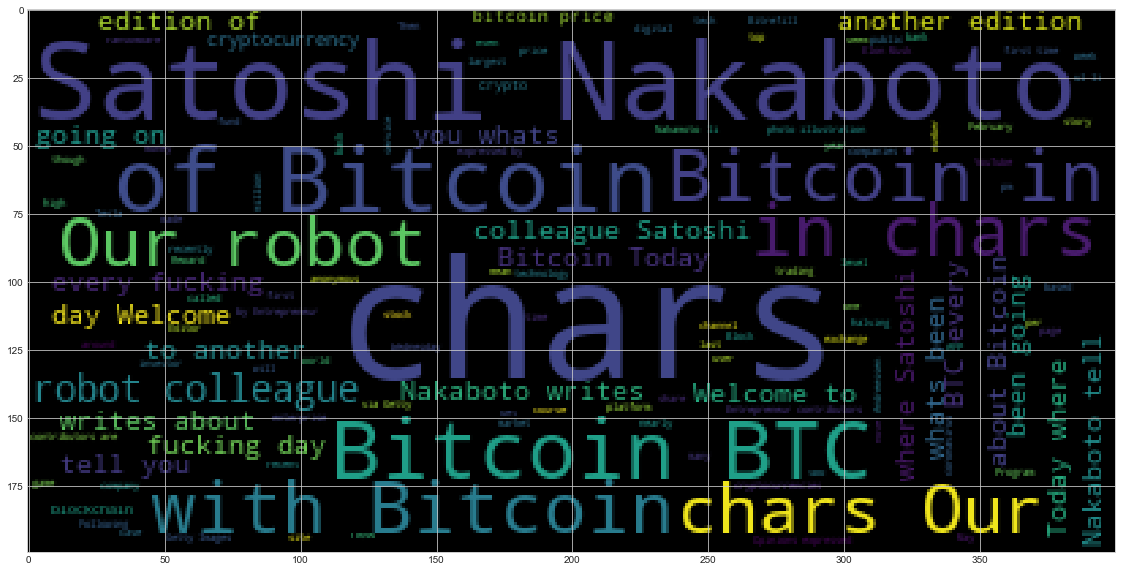

In [27]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(' '.join(bitcoin_df['tokens']))
plt.imshow(bitcoin_wc)

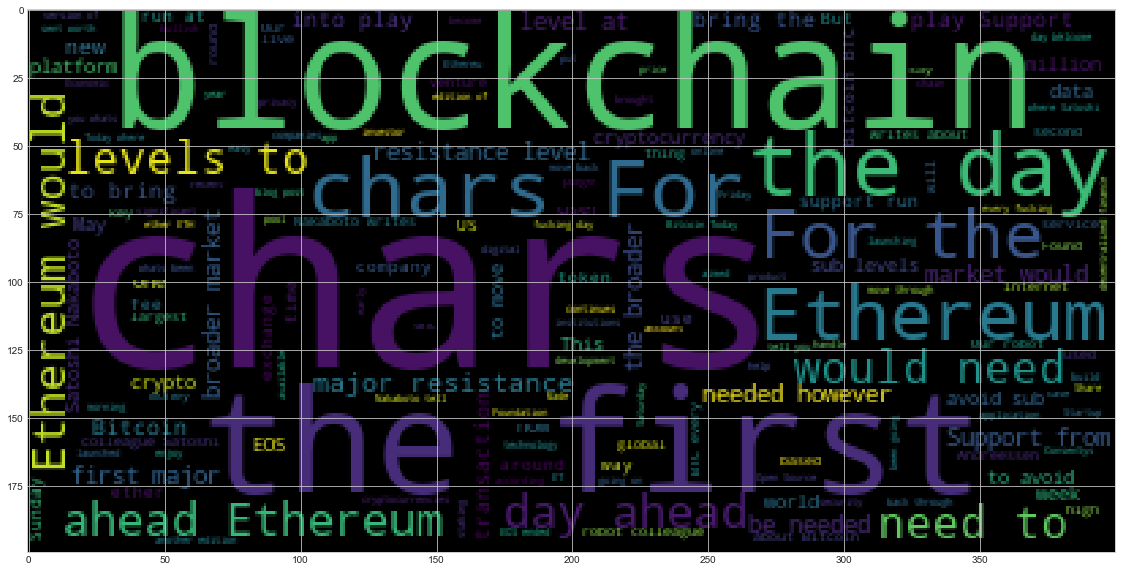

In [28]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(' '.join(ethereum_df['tokens']))
plt.imshow(ethereum_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [32]:
# Concatenate all of the bitcoin text together
bitcoin_text=[i.lower().replace(' ', '_') for i in bitcoin_df['tokens']]
bitcoin_text

['the_winklevoss_twinsthe_brothers_mark_zuckerberg_allegedly_stole_the_idea_for_facebook_fromare_making_a_movie_about_themselves,_deadline_reported_this_week._if_that_doesnt_seem_masturbatory_enough,_r…_[+2657_chars]',
 'if_youre_planning_to_do_some_protesting_and_you_dont_want_to_risk_your_expensive_smartphone_in_the_processor_you_simply_want_to_keep_yourself_as_anonymous_as_possible_while_youre_outconsider_buying_a…_[+5568_chars]',
 'reuters\r\n<ul><li>goldman_sachs_gave_five_reasons_why_it_thinks_bitcoin_is_"not_an_asset_class"_nor_"a_suitable_investment"_in_a_presentation_wednesday_morning.</li><li>goldman_observed_that_the_crypt…_[+3412_chars]',
 '<ul><li>famed_investor_michael_novogratz_tweeted_on_monday_that_bitcoin_will_soon_take_out_the_$10,000_resistance_level,_telling_his_followers,_"get_on_the_train."</li><li>novogratz_said_that_turmoil…_[+2757_chars]',
 'our_robot_colleague_satoshi_nakaboto_writes_about_bitcoin_btc_every_fucking_day.\r\nwelcome_to_another_edition_of_bitcoi

In [36]:
# Run the NER processor on all of the text


displacy.render(bitcoin_text)
# Add a title to the document

ValueError: [E096] Invalid object passed to displaCy: Can only visualize Doc or Span objects, or dicts if set to manual=True.

In [32]:
# Render the visualization

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
ethereum_text=[i.lower().replace(' ', '_') for i in ethereum_df['tokens']]
ethereum_text

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
displacy.render(ethereum_text)

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities


Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f